In [1]:
import pyzx as zx 
from graph_loader import load_graph
import networkx as nx
from f2linalg.f2linalg import Mat2
import numpy as np
from pyzx.pauliweb import PauliWeb

In [9]:
# This is the choi state graph equivalent to one ZZ measurement on 2 qubits
lg = load_graph("zxgs/xx_stab_choi.zxg")

zx.draw(lg, labels=True)

[15, 8, 11, 12, 9, 13, 10, 14, 4, 5, 6, 7]


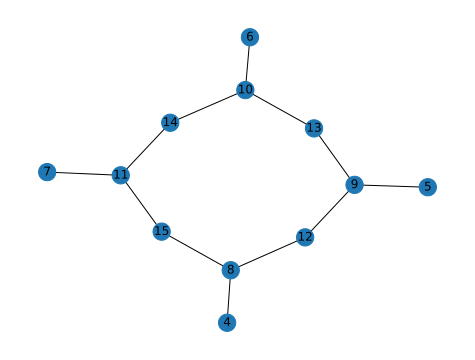

In [10]:
new_order = [4,5,6,7,8,9,10,11,12,13,14,15]
g = nx.Graph([(15,8),(15,11),\
              (8,12),(12,9),(9,13),(13,10),(14,10),(14,11),\
                (8,4),(9,5),(10,6),(11,7)])
g_reordered = nx.to_numpy_array(g, nodelist=new_order, dtype=np.uint8)
nx.draw(g, with_labels=True)
print(g.nodes)

In [11]:
# The 4 here is number of output spiders
outs = 4
N = g_reordered#nx.adjacency_matrix(g).todense()
I_n = np.eye(outs, dtype=np.uint8)
zeroblock = np.zeros((N.shape[1]-outs, outs), dtype=np.uint8)
mdl = np.vstack((I_n, zeroblock))
md = Mat2(np.hstack((mdl, N)))
print(md)
print(len(md.data))

[ 1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0 ]
[ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ]
[ 0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0 ]
[ 0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0 ]
[ 0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  1 ]
[ 0  0  0  0  0  1  0  0  0  0  0  0  1  1  0  0 ]
[ 0  0  0  0  0  0  1  0  0  0  0  0  0  1  1  0 ]
[ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  1 ]
[ 0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0 ]
12


In [12]:
no_output = np.hstack((np.eye(2*outs, dtype=np.uint8), np.zeros((2*outs, len(md.data[0])-2*outs), dtype=np.uint8)))
# print(no_output)
# print(md.data)
md_no_output = Mat2(np.vstack((md.data, no_output)))
# print(md_no_output.data)
mdnons = np.hstack([np.array(vec.data)for vec in md_no_output.nullspace()])

print(mdnons)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]


In [13]:
def get_pw(v,g):
    print(np.nonzero(v)[0])
    color = g.ty[np.nonzero(v)[0][0]]
    pw = PauliWeb(g)
    # Cuz pauliweb type will be opposite colored
    if color == 1:
        pwtype = 'X'
    elif color == 2:
        pwtype = 'Z'
    edges = set()
    for i in np.nonzero(v)[0]:
        for edge in g.edges():
            if i in edge:
                if edge in edges:
                    edges.remove(edge)
                else:
                    edges.add(edge)
    for e in edges:
        pw.add_edge(e,pwtype)
    return pw

In [14]:
v = mdnons[:,0]
d = new_order
pw = get_pw(d, v, lg)
print(pw)
# zx.draw(lg, labels=True)
# pw = PauliWeb(lg)
# pw.add_edge((11,7), 'X')
zx.draw(lg, labels=True, pauli_web=pw)

TypeError: get_pw() takes 2 positional arguments but 3 were given

In [ ]:
g = load_graph("zxgs/")

In [ ]:
from detection_webs import get_detection_webs
g = load_graph("zxgs/xx_stab_choi.zxg")
g.set_inputs([4,5])
g.set_outputs([6,7])
pws = get_detection_webs(g)
for pw in pws:
    zx.draw(g, labels=True, pauli_web=pw)


[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
2
[0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
{4: 0, 5: 1, 6: 2, 7: 3, 8: 4, 9: 5, 10: 6, 11: 7, 12: 8, 13: 9, 14: 10, 15: 11}
Z


In [ ]:
test_g = load_graph("zxgs/xxx_detection_graph.zxg")

zx.draw(test_g, labels=True)

In [ ]:
test_g.set_inputs([0,3,4])
test_g.set_outputs([1,2,5])
pws = get_detection_webs(test_g)
for pw in pws:
    zx.draw(test_g, labels=True, pauli_web=pw)